In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Dataset.csv')

In [3]:
df.shape

(649, 33)

In [4]:
df.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     599 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        576 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  576 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      573 non-null    object 
 19  internet    649 non-null    o

<h1 style="color:Red">Level 1</h1>

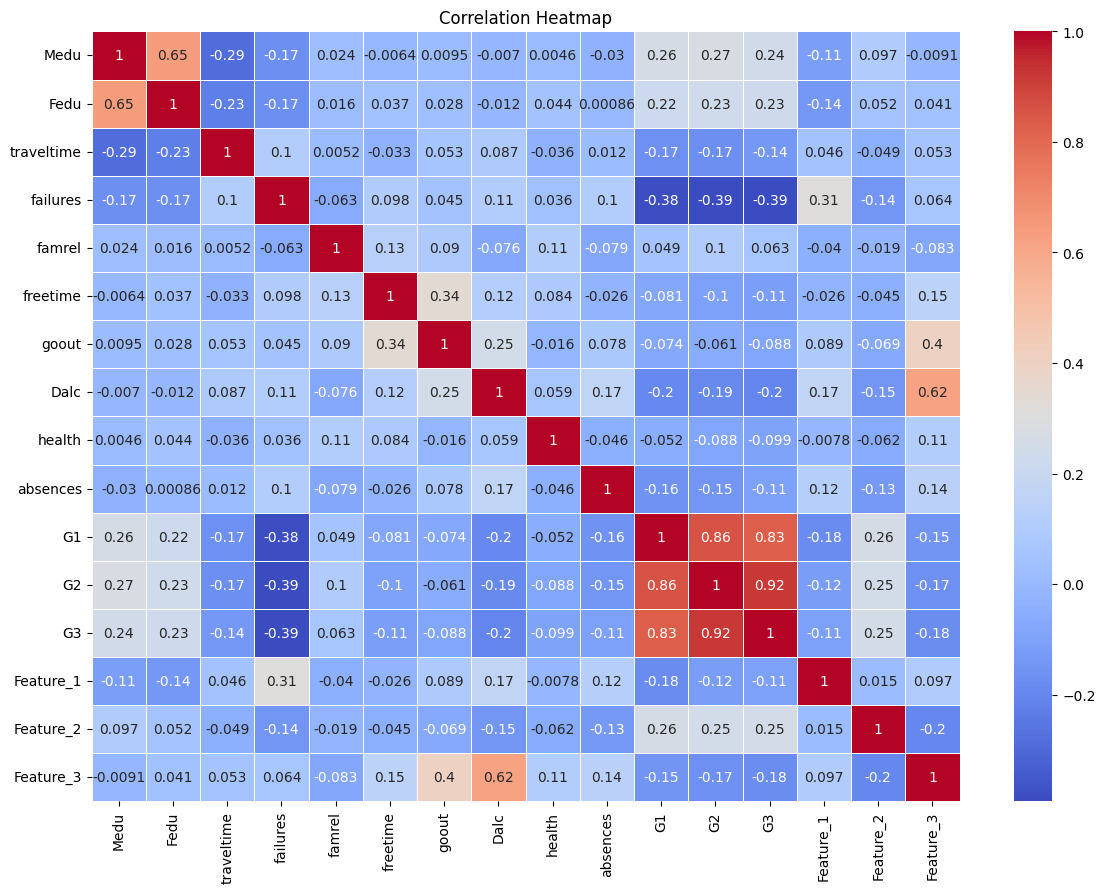

In [6]:
correlation_matrix = df.corr(numeric_only=True)

# Heatmap for correlation matrix
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [7]:
features_to_investigate = ['Feature_1', 'Feature_2', 'Feature_3']

for feature in features_to_investigate:
    print(f"\n--- Top Correlations with {feature} ---")
    print(correlation_matrix[feature].sort_values(ascending=False))


--- Top Correlations with Feature_1 ---
Feature_1     1.000000
failures      0.312151
Dalc          0.168583
absences      0.119640
Feature_3     0.097160
goout         0.089430
traveltime    0.045970
Feature_2     0.014528
health       -0.007759
freetime     -0.026015
famrel       -0.040149
G3           -0.105610
Medu         -0.111327
G2           -0.118624
Fedu         -0.138840
G1           -0.181571
Name: Feature_1, dtype: float64

--- Top Correlations with Feature_2 ---
Feature_2     1.000000
G1            0.261477
G3            0.249884
G2            0.245547
Medu          0.097210
Fedu          0.051633
Feature_1     0.014528
famrel       -0.018598
freetime     -0.045388
traveltime   -0.048797
health       -0.062246
goout        -0.068552
absences     -0.133554
failures     -0.144468
Dalc         -0.147515
Feature_3    -0.199162
Name: Feature_2, dtype: float64

--- Top Correlations with Feature_3 ---
Feature_3     1.000000
Dalc          0.624373
goout         0.397811
freetime

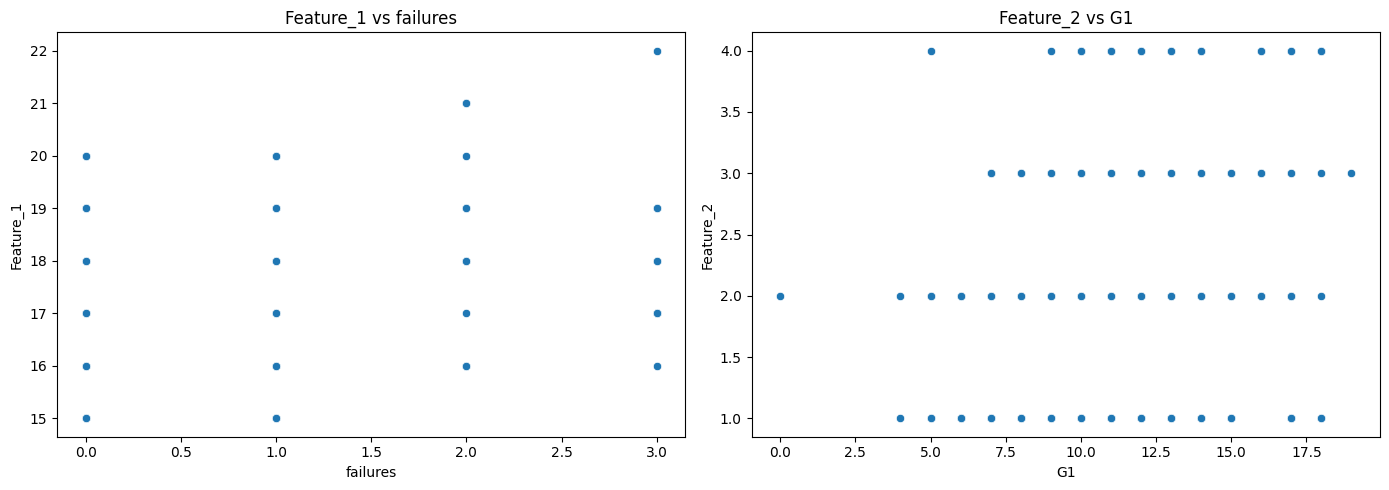

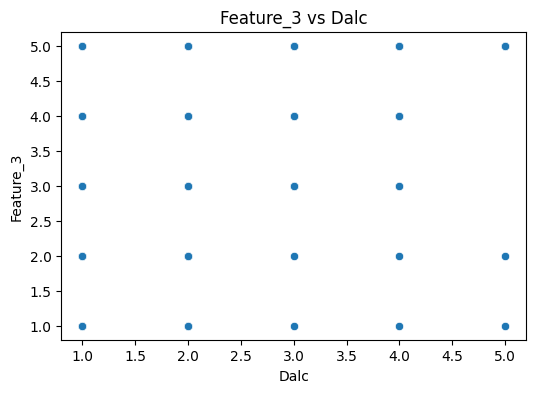

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(data=df, x='failures', y='Feature_1', ax=axs[0])
axs[0].set_title('Feature_1 vs failures')
axs[0].set_xlabel('failures')
axs[0].set_ylabel('Feature_1')

sns.scatterplot(data=df, x='G1', y='Feature_2', ax=axs[1])
axs[1].set_title('Feature_2 vs G1')
axs[1].set_xlabel('G1')
axs[1].set_ylabel('Feature_2')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Dalc', y='Feature_3')
plt.title('Feature_3 vs Dalc')
plt.xlabel('Dalc')
plt.ylabel('Feature_3')
plt.show()

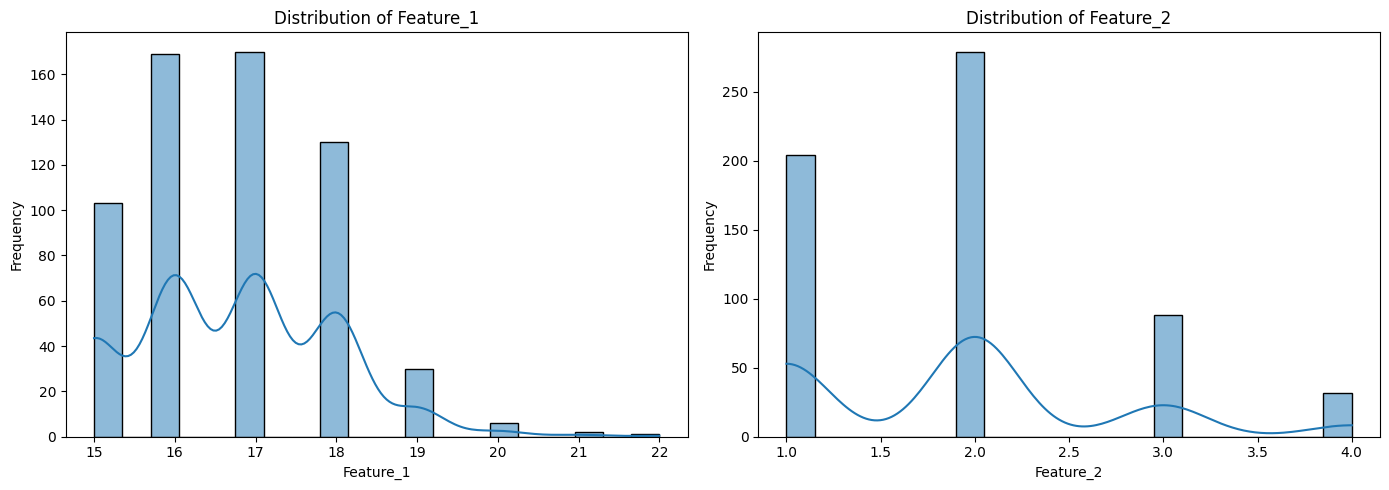

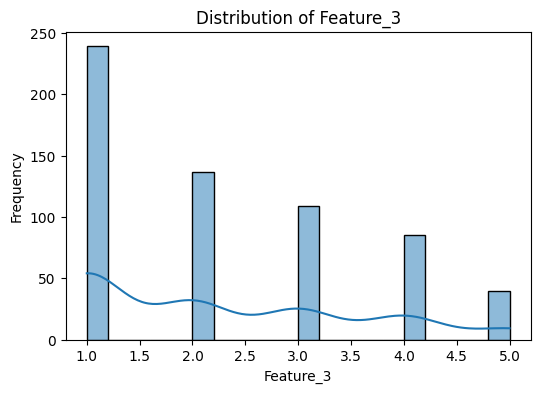

In [9]:

features_to_investigate = ['Feature_1', 'Feature_2', 'Feature_3']
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['Feature_1'], kde=True, bins=20, ax=axs[0])
axs[0].set_title("Distribution of Feature_1")
axs[0].set_xlabel("Feature_1")
axs[0].set_ylabel("Frequency")

sns.histplot(df['Feature_2'], kde=True, bins=20, ax=axs[1])
axs[1].set_title("Distribution of Feature_2")
axs[1].set_xlabel("Feature_2")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df['Feature_3'], kde=True, bins=20)
plt.title("Distribution of Feature_3")
plt.xlabel("Feature_3")
plt.ylabel("Frequency")
plt.show()


<h2 style="color:Blue">Final Conclusion</h2>
<h4 style="color:blue">Feature 1 likely represent Age due to its strong correlation with Failure</h4>
<h4 style="color:blue">Feature 2 likely represent Study_Time due to its strong correlation with Grades</h4>
<h4 style="color:blue">Feature 3 likely represent Party_frequency due to its strong correlation with alcohol and go out</h4>

<h1 style="color:red">Level 2</h1>

In [10]:
((df.isnull().sum())/len(df))*100

school         0.000000
sex            0.000000
address        0.000000
famsize        7.704160
Pstatus        0.000000
Medu           0.000000
Fedu          11.248074
Mjob           0.000000
Fjob           0.000000
reason         0.000000
guardian       0.000000
traveltime    11.248074
failures       0.000000
schoolsup      0.000000
famsup         0.000000
paid           0.000000
activities     0.000000
nursery        0.000000
higher        11.710324
internet       0.000000
famrel         0.000000
freetime       6.933744
goout          0.000000
Dalc           0.000000
health         0.000000
absences      10.631741
G1             0.000000
G2             5.392912
G3             0.000000
Feature_1      5.855162
Feature_2      7.087827
Feature_3      6.009245
romantic       0.000000
dtype: float64

<h2 style="color:blue">Features With Missing Value</h2>

In [11]:
value=((df.isnull().sum())/len(df))*100
non_zero=value[value>0]
print(non_zero)

famsize        7.704160
Fedu          11.248074
traveltime    11.248074
higher        11.710324
freetime       6.933744
absences      10.631741
G2             5.392912
Feature_1      5.855162
Feature_2      7.087827
Feature_3      6.009245
dtype: float64


In [12]:
numeric_cols = df[non_zero.index].select_dtypes(include=['int64', 'float64']).columns
skew_value=df[numeric_cols].skew()
print(skew_value)

Fedu          0.226308
traveltime    1.226471
freetime     -0.191216
absences      2.015473
G2           -0.407739
Feature_1     0.442497
Feature_2     0.720455
Feature_3     0.641965
dtype: float64


<h2 style="color:blue">Suggested_Method</h2>

<h4 style="color:blue">for variable whose mod value of skew>0.5 we will use median because median is robust for skewed data</h4>
<h4 style="color:blue">for variable whose mod value of skew<0.5 we will use mean because mean work best for symmetry data</h4>                       <h4 style="color:blue">variable whose data are type of boolean such as higher we will use mod</h4

In [13]:

df['famsize'] = df['famsize'].fillna(df['famsize'].mode()[0])
df['higher'] = df['higher'].fillna(df['higher'].mode()[0])
df['Fedu'] = df['Fedu'].fillna(df['Fedu'].mean())
df['freetime'] = df['freetime'].fillna(df['freetime'].mean())
df['G2'] = df['G2'].fillna(df['G2'].mean())
df['Feature_1'] = df['Feature_1'].fillna(df['Feature_1'].mean())
df['traveltime'] = df['traveltime'].fillna(df['traveltime'].median())
df['absences'] = df['absences'].fillna(df['absences'].median())
df['Feature_2'] = df['Feature_2'].fillna(df['Feature_2'].median())
df['Feature_3'] = df['Feature_3'].fillna(df['Feature_3'].median())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     649 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        649 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  649 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      649 non-null    object 
 19  internet    649 non-null    o

<h1 style="color:red">Level 3</h1>

<h2 style="color:blue">Q1.Are students with Internet perfoming better?</h2>

Text(0.5, 1.0, 'Grade Distribution by Internet Access')

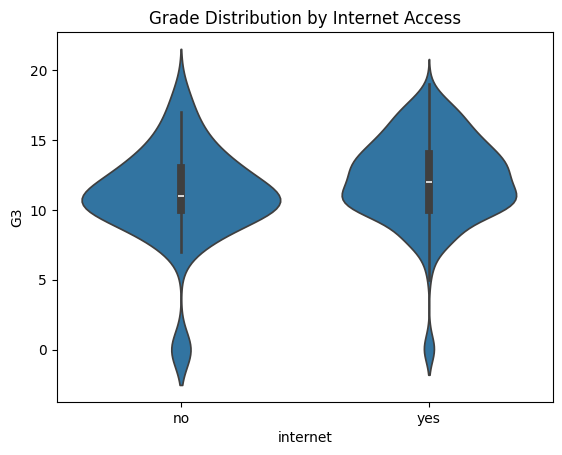

In [15]:
sns.violinplot(x='internet', y='G3', data=df)
plt.title("Grade Distribution by Internet Access")

<h4 style="color:blue">Violin plot suggest that student without internet suffer most as it ihas longer lower tail.thus we can say "Internet Access Linked to Higher, More Consistent Grades"</h4>

<h2 style="color:blue">Q2.Does Relationship affect Academics?</h2>

Text(0.5, 1.0, 'Average Grades by Romantic Relationship Status')

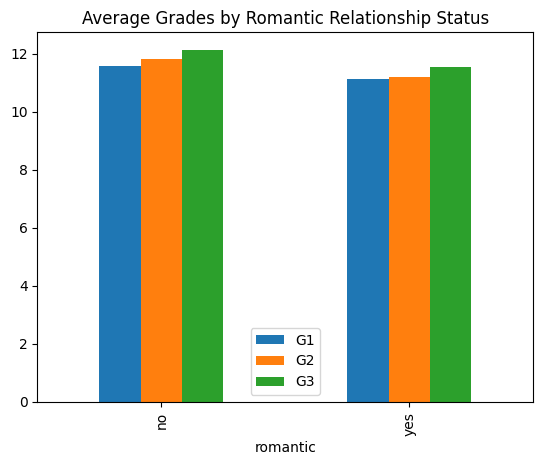

In [16]:
df[['G1','G2','G3']].groupby(df['romantic']).mean().plot(kind='bar')
plt.title("Average Grades by Romantic Relationship Status")

<h4 style="color:blue">Students without romantic relationships maintain slightly higher grades across all terms, suggesting time management trade-offs.</h4>

<h2 style="color:blue">Q3.How does travel time impact attendance?</h2>

Text(0.5, 1.0, 'Travel time impacting Distances')

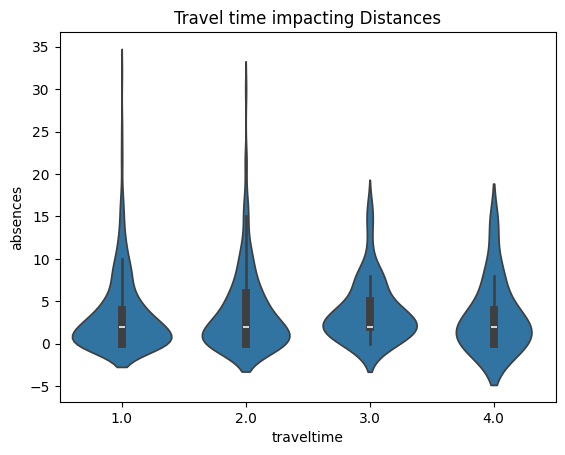

In [17]:
sns.violinplot(x='traveltime', y='absences', data=df)
plt.title("Travel time impacting Distances")

<h4 style="color:blue">travel time dosent impact attendes neglecting minor studens who might have some problem</h4>

<h2 style="color:blue">Q4.Does Paid Class improve grades?</h2>

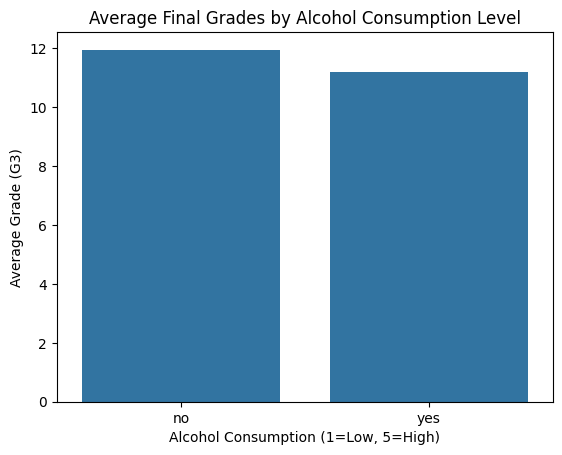

In [18]:
sns.barplot(x='paid', y='G3', data=df,errorbar=None)
plt.title("Average Final Grades by Alcohol Consumption Level")
plt.xlabel("Alcohol Consumption (1=Low, 5=High)")
plt.ylabel("Average Grade (G3)")
plt.show()

<h4 style="color:blue">Student without paid class are performing better might be because of getting extra time for self study</h4>

<h2 style="color:blue">Q5. Are Students Who Drink Alcohol Performing Worse?</h2>

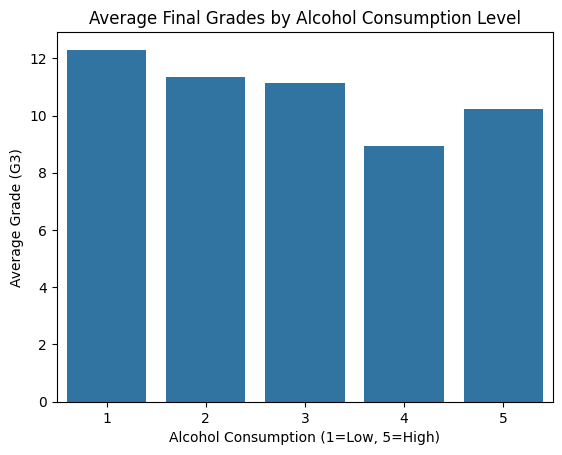

In [19]:
sns.barplot(x='Dalc', y='G3', data=df,errorbar=None)
plt.title("Average Final Grades by Alcohol Consumption Level")
plt.xlabel("Alcohol Consumption (1=Low, 5=High)")
plt.ylabel("Average Grade (G3)")
plt.show()

<h4 style="color:blue">Students with higher alcohol consumption (levels 4-5) average 2-3 points lower grades than occasional/non-drinkers (levels 1-2), indicating potential academic risks from frequent drinking.</h4>

<h2 style="color:red">Level 4</h2>

In [20]:
from sklearn.model_selection import train_test_split

X = df[['G3', 'goout', 'freetime', 'absences', 'Feature_1', 'Feature_2']]
y = df['romantic'].map({'yes':1, 'no':0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
from sklearn.metrics import classification_report, roc_auc_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.2f}")
    
evaluate(lr, X_test, y_test)


              precision    recall  f1-score   support

           0       0.64      0.95      0.77        81
           1       0.60      0.12      0.20        49

    accuracy                           0.64       130
   macro avg       0.62      0.54      0.48       130
weighted avg       0.63      0.64      0.55       130

ROC-AUC: 0.54


<h4 style="color:blue">Logistic Regression Model give precision of 64 and 60 percent only</h4>

In [23]:
df['romantic'].value_counts()


romantic
no     410
yes    239
Name: count, dtype: int64

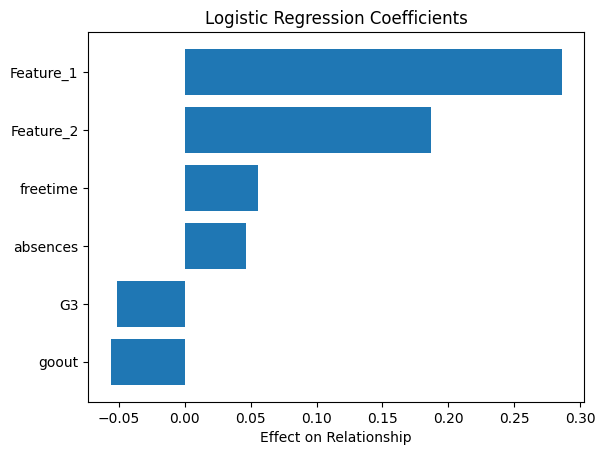

In [24]:
feature = X.columns
coefficients = lr.coef_[0]

coef_df = pd.DataFrame({'Feature': feature, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient')

plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.title("Logistic Regression Coefficients")
plt.xlabel("Effect on Relationship")
plt.show()


<h4 style="color:blue">From graph we can clearly see that student having Feature_1 and Feature_2 quality are linkely to involved in Relation</h4>

<h2 style="color:blue">Using Forest Decision Tree Approach</h2>

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
evaluate(rf, X_test, y_test)


              precision    recall  f1-score   support

           0       0.65      0.79      0.72        81
           1       0.47      0.31      0.37        49

    accuracy                           0.61       130
   macro avg       0.56      0.55      0.54       130
weighted avg       0.58      0.61      0.59       130

ROC-AUC: 0.55


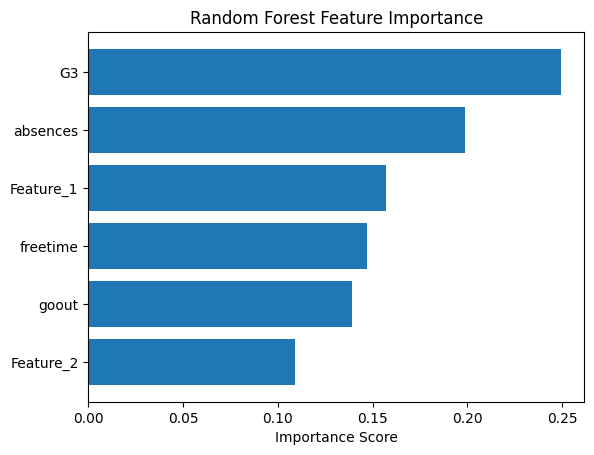

In [26]:
importances = rf.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=True)


plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.show()

<h2 style="color:blue">From Both Logistic and Random we came to know that student wth low,grades,not going to classes and who drinks is likely of being in relationship</h2>

<h2 style="color:red">Level 5</h2>

<h1 style="color:red">Bonus Level</h1>


<h2 style="color:blue">Plot 1:Decision_Tree Reason:The boundary is piecewise constant with right angle</h2>
<h2 style="color:blue">Plot 2:Random_Forest Reason:more complex with irregular regins</h2>
<h2 style="color:blue">Plot 3:Logistic Reason:The boundary is Smooth and linear</h2>